In [18]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data = h5py.File("outhello.hdf5")
print(data.keys())
print(data.attrs["header"])
# data.close()

<KeysViewHDF5 ['mydataset']>
['robot0_proprio' 'object' 'environment']


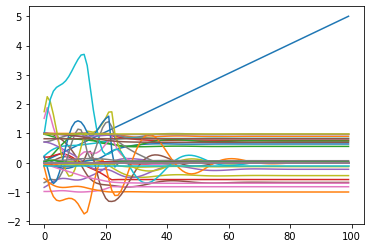

In [20]:
plt.plot(data['mydataset'])